## in this project we will work with breast cancer dataset from sklearn
## our porblem is to classify the cancer as malignant or benign

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier



np.random.seed(42)

In [47]:
df = load_breast_cancer(as_frame=True)

In [48]:
df['data'].columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [49]:
df['data'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [50]:
df['data'].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
df['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [52]:
df['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [53]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

## so we have 357 malignant tumors labeled as 1, and 257 benign as 0

## split the target and features

In [54]:
X = df['data']
y = df['target']

## split the train and test set.
## set the test size to 25% and 75% for the train

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

## Normalize the data for numerical stability

In [57]:
train_scaler = StandardScaler()
X_train = train_scaler.fit_transform(X_train)

test_scaler = StandardScaler()
X_test = test_scaler.fit_transform(X_test)

## fit a logistic regression model to the training set

In [58]:
log_model = LogisticRegression()

log_model.fit(X_train, y_train)

pred = log_model.predict(X_test)

## Evalute the model

In [59]:
TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()

print("True Positive (TP): ", TP)
print("False Positive (FP): ", FP)
print("True Negative(TN): ", TN)
print("False Negatie (FN): ", FN)

True Positive (TP):  89
False Positive (FP):  2
True Negative(TN):  52
False Negatie (FN):  0


In [60]:
conf_m = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)
c_report = classification_report(y_test, pred)

In [61]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", c_report)
print("Confusion Matrix:\n", conf_m)

Accuracy: 98.60%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion Matrix:
 [[52  2]
 [ 0 89]]


## we can also calculate the accuracy this way.

In [62]:
accuracy_2 = (TP + TN) / (TP + TN + FP + FN )
print(f"Accuracy: {accuracy_2 * 100:.2f}%")


Accuracy: 98.60%


## now we will use a bunch of binary classifiers in the scikit-learn library.

In [63]:
# we will store the models in one array to quickly loop over them
models = {}

models['Logistic Regression'] = LogisticRegression()

models['Linear SVC'] = LinearSVC()

models['Decision Tree'] = DecisionTreeClassifier()

models['Random Forest'] = RandomForestClassifier()

models['Gassian NB'] = GaussianNB()

models['K Neighbors'] = KNeighborsClassifier()

In [64]:
accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # fit x & y train
    models[key].fit(X_train, y_train)

    # predict
    predictions = models[key].predict(X_test)

    # scores
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)



In [65]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy','Precision','Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

In [66]:
print(df_model)

                     Accuracy  Precision    Recall
Logistic Regression  0.986014   1.000000  0.978022
Linear SVC           0.972028   0.988764  0.967033
Decision Tree        0.937063   0.955056  0.944444
Random Forest        0.965035   0.988764  0.956522
Gassian NB           0.951049   0.977528  0.945652
K Neighbors          0.958042   0.988764  0.946237


## plot the performance of every classifier

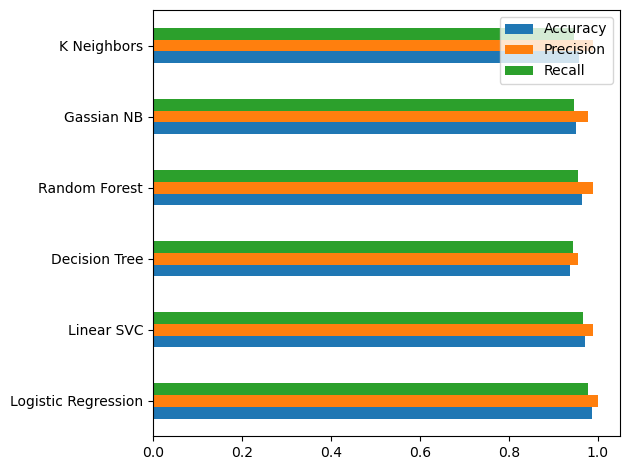

In [67]:
ax = df_model.plot.barh()

plt.tight_layout()

## roc curve

In [68]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred)

## function to plot the roc curve

In [69]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

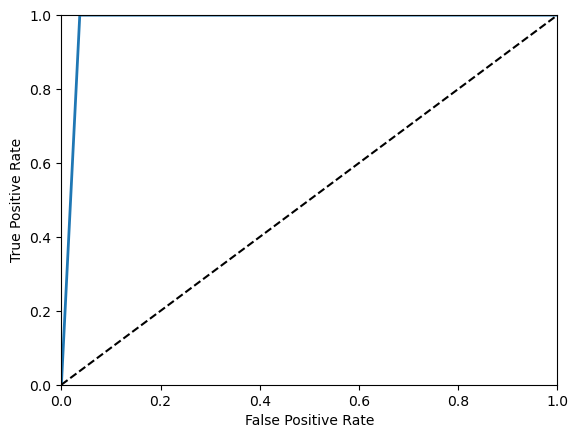

In [70]:
plot_roc_curve(fpr, tpr)
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.9814814814814815

## function to plot the precision and recall curve

In [72]:
def plot_precision_recall_vs_threshold(precision, recall,thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recall[:-1], 'g--', label = "Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

In [73]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

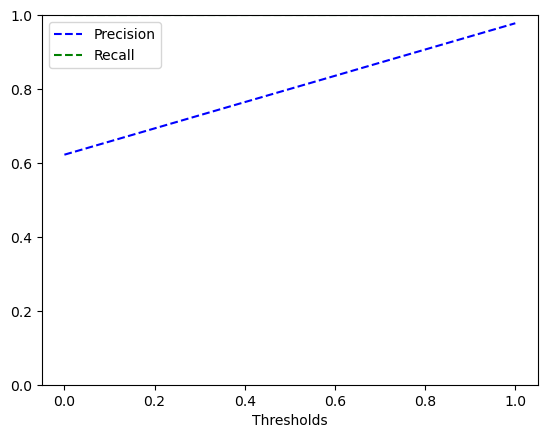

In [74]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

## let's train a randomforestclassifier and compute it's ROC curve and ROC AUC scoure

In [75]:
from sklearn.model_selection import cross_val_predict
forest_cls = RandomForestClassifier()
y_proba_forest = cross_val_predict(forest_cls, X_train, y_train, cv=3, method='predict_proba') 

In [76]:
y_score_forest = y_proba_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_score_forest)

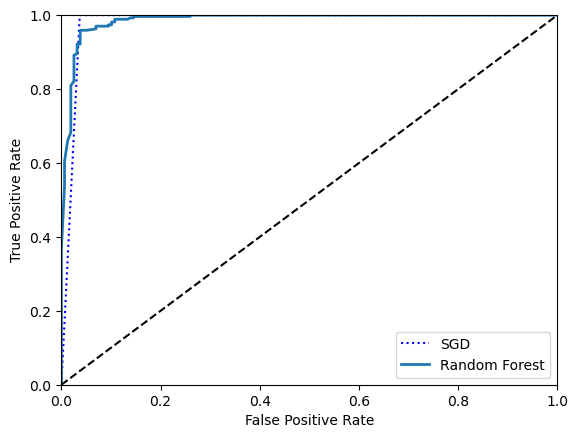

In [77]:
plt.plot(fpr,tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [78]:
roc_auc_score(y_train, y_score_forest)

0.986680521443416